In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.image as image
import matplotlib.pyplot as plt
%matplotlib inline

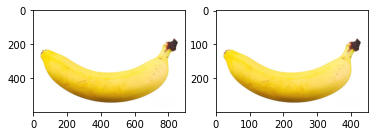

img size =  (900, 600) | zoom_in_img size =  (450, 300)


In [ ]:
#1.Ubah ukuran citra banana.jpg menjadi setengah dari ukuran semula (300x450).
from PIL import Image
#baca img
img = Image.open("banana.jpg")

#zoom_in img (1/2 ukuran semula)
zoom_in_img = img.resize((450, 300))

fig, ax = plt.subplots(1, 2)
ax[0].imshow(img)
ax[1].imshow(zoom_in_img)
plt.show()
print("img size = ", img.size, "|", "zoom_in_img size = ", zoom_in_img.size)

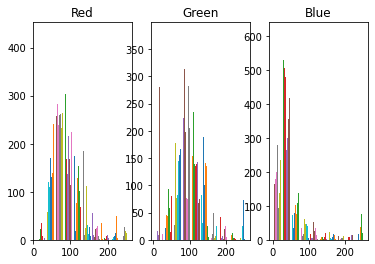

In [ ]:
#2.Tampilkan histogram citra bird.jpg untuk masing-masing komponen warna dalam satu grafik.
img = image.imread('bird.jpg')

#histogram masing-masing komponen warna
fig, ax = plt.subplots(1, 3)
ax[0].hist(img[:,:,0])
ax[0].set_title('Red')
ax[1].hist(img[:,:,1])
ax[1].set_title('Green')
ax[2].hist(img[:,:,2])
ax[2].set_title('Blue')

#tampilkan histogram
plt.show()

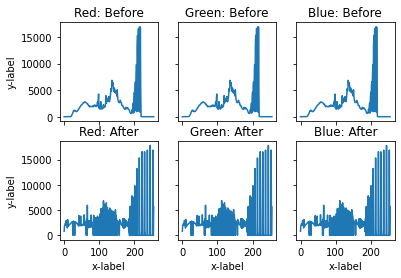

In [ ]:
#3.Gunakan perataan histogram untuk masing-masing komponen warna untuk memperbaiki kualitas
#citra kabut.png. Tampilkan histogramnya sebelum dan sesudah perataan untuk masing-masing komponen warna.
import cv2

#baca img
img = cv2.imread('kabut.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#perataan histogram
equ = cv2.equalizeHist(img)

#baca img dalam rgb
img_rgb = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
equ_rgb = cv2.cvtColor(equ, cv2.COLOR_GRAY2RGB)

#histogram masing-masing komponen warna sebelum perataan
histr1 = cv2.calcHist([img_rgb],[0],None,[256],[0,256])
histr2 = cv2.calcHist([img_rgb],[1],None,[256],[0,256])
histr3 = cv2.calcHist([img_rgb],[2],None,[256],[0,256])

#histogram masing-masing komponen warna setelah perataan
histr4 = cv2.calcHist([equ_rgb],[0],None,[256],[0,256])
histr5 = cv2.calcHist([equ_rgb],[1],None,[256],[0,256])
histr6 = cv2.calcHist([equ_rgb],[2],None,[256],[0,256])

fig, axs = plt.subplots(2, 3)
axs[0, 0].plot(histr1)
axs[0, 0].set_title('Red: Before')
axs[0, 1].plot(histr2)
axs[0, 1].set_title('Green: Before')
axs[0, 2].plot(histr3)
axs[0, 2].set_title('Blue: Before')
axs[1, 0].plot(histr4)
axs[1, 0].set_title('Red: After')
axs[1, 1].plot(histr5)
axs[1, 1].set_title('Green: After')
axs[1, 2].plot(histr6)
axs[1, 2].set_title('Blue: After')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

for ax in axs.flat:
    ax.label_outer()


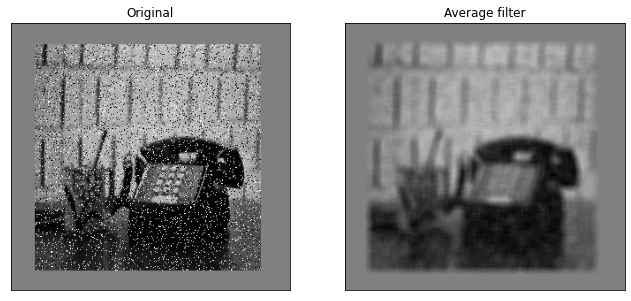

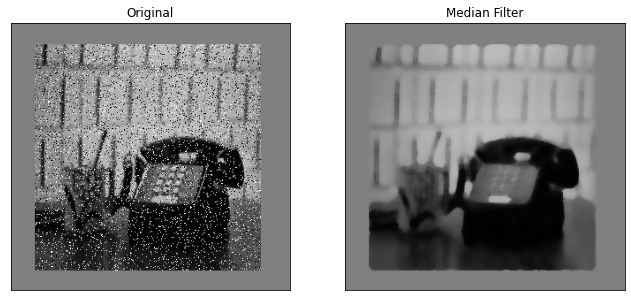

In [ ]:
#5.Hilangkan noise pada citra phone_noise.jpg menggunakan average dan median filter.
import cv2
from matplotlib import pyplot as plt
from PIL import Image, ImageFilter

#menggunakan average filter
image = cv2.imread('phone_noise.jpg') 
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) 
figure_size = 9
new_image = cv2.blur(image,(figure_size, figure_size))
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_HSV2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_HSV2RGB)),plt.title('Average filter')
plt.xticks([]), plt.yticks([])
plt.show()

#menggunakan median filter
new_image = cv2.medianBlur(image, figure_size)
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_HSV2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_HSV2RGB)),plt.title('Median Filter')
plt.xticks([]), plt.yticks([])
plt.show()